<a href="https://colab.research.google.com/github/2813/dls-homework/blob/main/%5Bhomework_4_2_%5Dgame_of_thrones_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

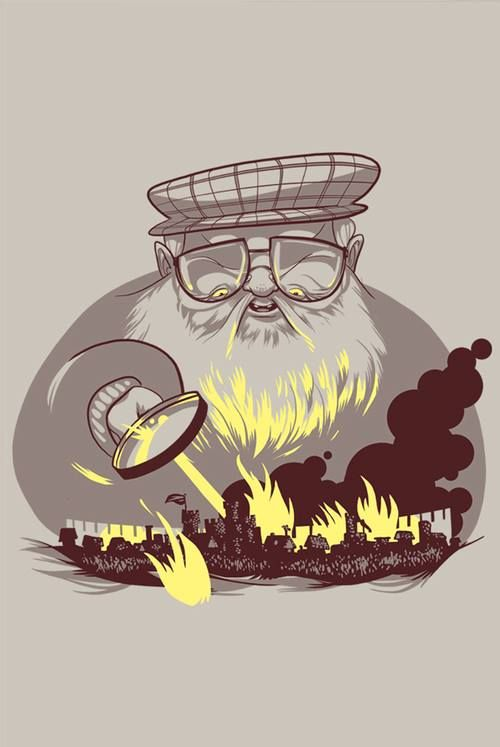

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [2]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 36.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 76.4MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data = pd.read_csv("/content/game_of_thrones_train.csv", index_col="S.No")

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [4]:
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [5]:
data.info() # cмотрим какие данные и сколько ненулевых полей. аналогично можно было посмотреть data.isna().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

In [185]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   house             1176 non-null   object 
 6   book1             1557 non-null   int64  
 7   book2             1557 non-null   int64  
 8   book3             1557 non-null   int64  
 9   book4             1557 non-null   int64  
 10  book5             1557 non-null   int64  
 11  isMarried         1557 non-null   int64  
 12  isNoble           1557 non-null   int64  
 13  age               279 non-null    float64
 14  numDeadRelations  1557 non-null   int64  
 15  popularity        1557 non-null   float64
 16  isAlive           1557 non-null   int64  
 17  

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [344]:
# создаем признак isPopular
data.loc[data["popularity"] > 0.5, ["isPopular"]] = 1
data.loc[data["isPopular"].isnull(), ["isPopular"]] = 0  # всем NaN в столбце isPopular присваиваем 0

In [345]:
data.loc[data["numDeadRelations"] > 0, ["boolDeadRelations"]] = 1
data.loc[data["boolDeadRelations"].isnull(), ["boolDeadRelations"]] = 0

In [4]:
# Подсказка
cult = {
    'Summer Islands': ['Summer Islands', 'Summer Islander', 'Summer Isles'],
    'Ghiscari': ['Ghiscari', 'Ghiscaricari',  'Ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'Braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'Qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}



In [ ]:
#for c in cult:
#  for altc in c:
#    data['culture'] = data['culture'].str.replace(altc, c) #  не ищет в разном регистре.

# не работает, виснет, не заменяет в разном регистре. Подвешивает среду выполнения. Хотя должно работать


In [ ]:
data.culture.value_counts()
# Посмотрим какие значения поля культура есть и чем отличаются

In [316]:
# и будем заменять из подсказки выше. не все что написано в подсказке выше есть в данных.

# было, стало
data = data.replace({'culture':{'Qarth': 'Qartheeneen',
  'Qartheeneen': 'Qartheen',
  'Braavos': 'Braavosi',\
  'Summer Isles': 'Summer Islands',\
  'Summer Islander': 'Summer Islands',
  'Ghiscaricari': 'Ghiscari',\
  'northmen': 'Northmen',
  'Northern mountain clans': 'Northmen',
  'westermen': 'Westermen',\
  'Westerman': 'Westermen',
  'Westerlands': 'Westermen',
  'Vale mountain clans': 'Valemen',
  'Vale': 'Valemen',
  'Ironborn': 'Ironmen',
  'ironborn': 'Ironmen',
  'free folk': 'Free Folk',
  'Free folk': 'Free Folk',
  'First Men': 'Free Folk',
  'Wildling':  'Free Folk',
  'Dornishmen': 'Dornish',
  'Dorne': 'Dornish',
  'Lhazarene': 'Lhazareen',
  'Andals': 'Andal',
  'Lyseni': 'Lysene',
  }})


In [ ]:
data.culture.value_counts()

Посмотрим на data.info() и видим, что некоторые поля, такие как mother, father заполнены только у двух десятка персонажей, у остальных они не заданы. Удалим из данных столбцы mother, father, heir, isAliveMother, isAliveFather, isAliveHeir, т.к. они заданы только для полтора процента данных. Вместо этих фич добавим одну (relatives), которая будет принимать значения 0 или 1 и указывать, что о родственниках этого персонажа есть какая то информация.

In [342]:
col2drop = ["mother", 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']
for i in col2drop:
  data.loc[(data[i].notnull()), ["relatives"]] = 1
data.loc[(data["relatives"].isnull()), ["relatives"]] = 0

In [343]:
data.drop(columns=col2drop, inplace=True)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [346]:
# уже выше удалили чать колонок.
# так же заметим линейную зависимость межку колоткой age и dateOfBirth. Удалим последнюю, оставив только age
data.drop(columns=["dateOfBirth"], inplace = True)
data.drop(columns=["isMarried"], inplace = True) # дублирует информацию поля Spouse
# так же удалим колонки numDeadRelations  и popularity. Мы их заменили на "булевые" фичи
data.drop(columns=["numDeadRelations", "popularity"], inplace = True)

# колонки age и culture выбросим. В них слишком много налов
data.drop(columns=["culture", 'age'], inplace = True)

# удалим также колонку Name. Она нам не поможет
data.drop(columns=["name"], inplace=True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

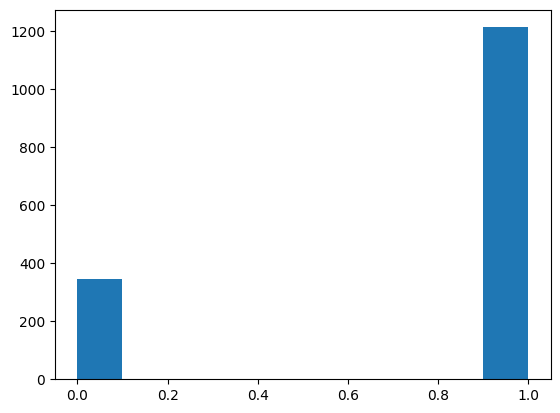

In [190]:
plt.hist(data['isAlive'])
plt.show()
# Видим на гистограмме, что класса (умерли) почти в 4 раза меньше чем класса (живые)

# Можно ли назвать сбалансированным такой датасет. наверное нет.

# переменная категориальная (да-нет)

In [347]:
data.loc[data.house.isnull(), ["house"]] = "UnknownHouse"
data.loc[data.title.isnull(), ["title"]] = "UnknownTitle"
# заменим NaN в title и House соответствующими значениями

In [307]:
data.isnull().sum() #убедимся что избавились от всех налов в данных. Часть выкинули, части присвоили значение

,0
title,0
male,0
house,0
book1,0
book2,0
book3,0
book4,0
book5,0
isNoble,0
numDeadRelations,0


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [348]:
cat_columns = ['title', 'house']

# копируем с семинара, делаем так же как там
from sklearn.preprocessing import OneHotEncoder

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(data[cat_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat_columns), index=data.index)

In [349]:
# Concatenate the one-hot encoded dataframe with the original dataframe
data = pd.concat([data, one_hot_df], axis=1)

# Drop the original categorical columns
data = data.drop(cat_columns, axis=1)

In [350]:
data

,male,book1,book2,book3,book4,book5,isNoble,numDeadRelations,popularity,isAlive,...,house_Sea watch,house_Second Sons,house_Stone Crows,house_Stormcrows,house_Summer Islands,house_The Citadel,house_UnknownHouse,house_Windblown,house_Wise Masters,house_wildling
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,11,0.605351,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,1,1,1,1,1,1,1,0.896321,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,1,0,1,0,0.267559,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,1,0,0.183946,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,0,0,1,0,1,0,0.043478,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,1,0,1,1,0,1,0,0.160535,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1554,0,1,1,0,0,0,0,0,0.040134,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1555,1,0,1,1,1,1,0,0,0.076923,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [ ]:
ddd = ["book1", "book2", "book3", "book4", "book5", "isAlive"]
df1  = data.loc[(data.book1 ==1) & (data.book2 ==1) & (data.book3 ==1) & (data.book4 ==1) & (data.book5 ==1) , ddd]

In [ ]:
df00000  = data.loc[(data.book1 ==0) & (data.book2 ==0) & (data.book3 ==0) & (data.book4 ==0) & (data.book5 ==0) , ddd]

In [ ]:
df10000  = data.loc[(data.book1 ==1) & (data.book2 ==0) & (data.book3 ==0) & (data.book4 ==0) & (data.book5 ==0) , ddd]

In [ ]:
df11000  = data.loc[(data.book1 ==1) & (data.book2 ==1) & (data.book3 ==0) & (data.book4 ==0) & (data.book5 ==0) , ddd]
df11100  = data.loc[(data.book1 ==1) & (data.book2 ==1) & (data.book3 ==1) & (data.book4 ==0) & (data.book5 ==0) , ddd]
df11110  = data.loc[(data.book1 ==1) & (data.book2 ==1) & (data.book3 ==1) & (data.book4 ==1) & (data.book5 ==0) , ddd]
df11111  = data.loc[(data.book1 ==1) & (data.book2 ==1) & (data.book3 ==1) & (data.book4 ==1) & (data.book5 ==1) , ddd]

In [ ]:
df01000  = data.loc[(data.book1 ==0) & (data.book2 ==1) & (data.book3 ==0) & (data.book4 ==0) & (data.book5 ==0) , ddd]
df01000.sum()

In [ ]:
df01000  = data.loc[(data.book1 ==0) & (data.book2 ==0) & (data.book3 ==1) & (data.book4 ==0) & (data.book5 ==0) , ddd]
df01000.sum()

In [ ]:
df01000  = data.loc[(data.book1 ==0) & (data.book2 ==0) & (data.book3 ==0) & (data.book4 ==1) & (data.book5 ==0) , ddd]
df01000.sum()

In [ ]:
df01000  = data.loc[(data.book1 ==0) & (data.book2 ==0) & (data.book3 ==0) & (data.book4 ==0) & (data.book5 ==0) , ddd]
df01000.sum()

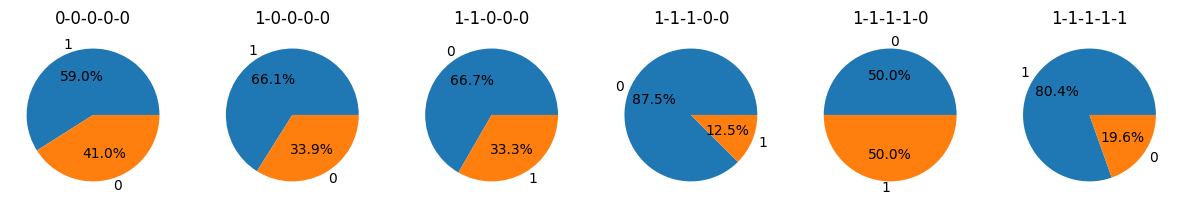

In [ ]:
# Готовим данные для графика
data1 = df00000['isAlive'].value_counts()
data2 = df10000['isAlive'].value_counts()
data3 = df11000['isAlive'].value_counts()
data4 = df11100['isAlive'].value_counts()
data5 = df11110['isAlive'].value_counts()
data6 = df11111['isAlive'].value_counts()

# Строим круговую диаграмму
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(15,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax3.pie(data3.values, labels=data3.index, autopct='%1.1f%%')
ax4.pie(data4.values, labels=data4.index, autopct='%1.1f%%')
ax5.pie(data5.values, labels=data5.index, autopct='%1.1f%%')
ax6.pie(data6.values, labels=data6.index, autopct='%1.1f%%')

ax1.set_title("0-0-0-0-0")
ax2.set_title("1-0-0-0-0")
ax3.set_title("1-1-0-0-0")
ax4.set_title("1-1-1-0-0")
ax5.set_title("1-1-1-1-0")
ax6.set_title("1-1-1-1-1")

#plt.legend(['не выжил, выжил'])

plt.show()

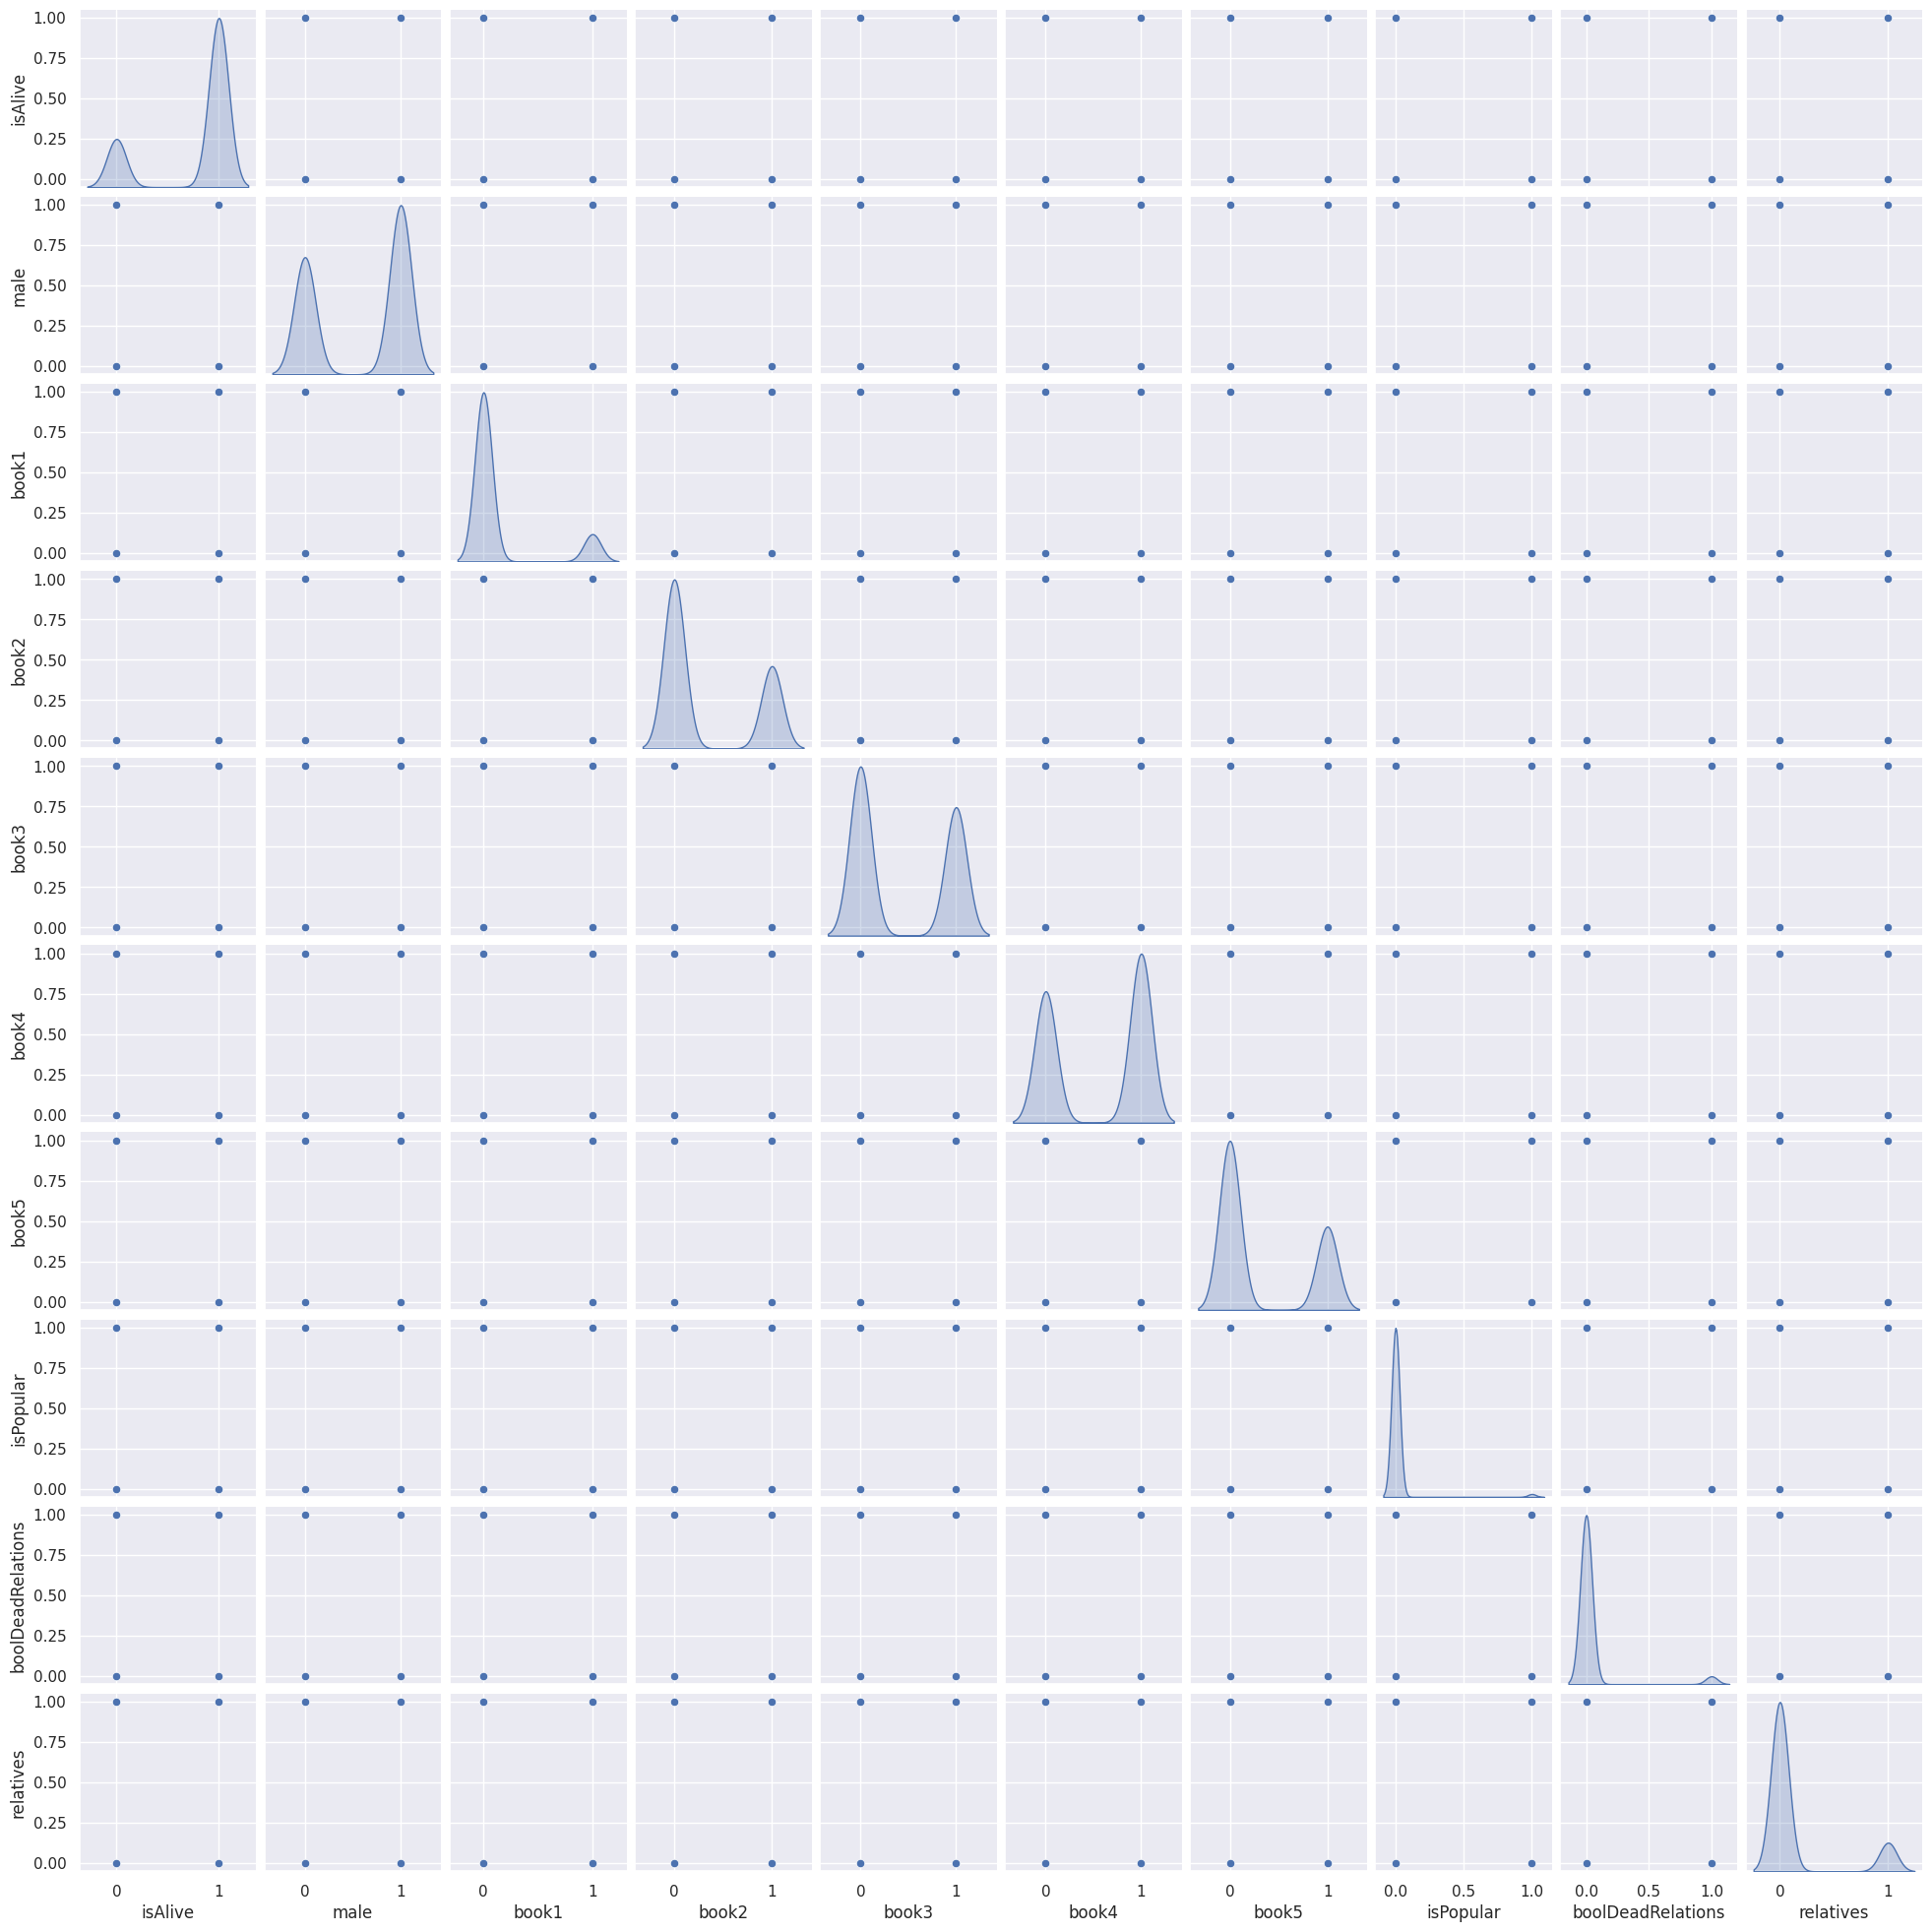

In [197]:
features = ["isAlive", "male", "book1", "book2", "book3", "book4", "book5", "isPopular", "boolDeadRelations", "relatives"] # перечислим признаки по которым будем смотреть корреляцию

sns.set()
sns.pairplot(data[features], height = 2 ,kind ='scatter',diag_kind='kde') # взаимные графики на куче признаков
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [351]:
X = data.drop(['isAlive'], axis=1)
y = data['isAlive']


**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [352]:
from sklearn.model_selection import train_test_split

In [353]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, shuffle=True, test_size=0.2, random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [354]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [355]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [356]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [211]:
# Шаг 1. создание модели
knn = KNeighborsClassifier(n_neighbors=4)

# Шаг 2. обучение модели
knn.fit(X_train, y_train)


# Шаг 3. Предсказание на тестовых данных
y_pred = knn.predict(X_test)

Будем сразу считать и accuracy для модели.

In [357]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8045


In [214]:
model_gaussian = GaussianProcessClassifier()
model_gaussian.fit(X_train, y_train)
y_pred = model_gaussian.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7724


In [216]:
model_gausianNB = GaussianNB()
model_gausianNB.fit(X_train, y_train)
y_pred = model_gausianNB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.4167


In [217]:
model_svc = SVC()
model_svc.fit(X_train, y_train)
y_pred = model_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7692


In [218]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7788


In [219]:
model_ada = AdaBoostClassifier()
model_ada.fit(X_train, y_train)
y_pred = model_ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy : 0.7724


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [204]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [207]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7692


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [225]:
# Шаг 3. Предсказание на тестовых данных
y_pred = model_rf.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8045


Выберите лучшую модель.

Посчитали accuracy для всех моделей в предыдущем пункте. Лучшей оказался RandomForestClassifier

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [208]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.99MB/s]


In [358]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [366]:
# Берем тестовые данные для них делаем те же самые манипуляции и прогоняем на лучшей модели
test_data = pd.read_csv("/content/game_of_thrones_test.csv", index_col="S.No")

In [367]:
col2drop = ["mother", 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']
for i in col2drop:
  test_data.loc[(test_data[i].notnull()), ["relatives"]] = 1
test_data.loc[(test_data["relatives"].isnull()), ["relatives"]] = 0

In [368]:
# создаем признак isPopular
test_data.loc[test_data["popularity"] > 0.5, ["isPopular"]] = 1
test_data.loc[test_data["isPopular"].isnull(), ["isPopular"]] = 0  # всем NaN в столбце isPopular присваиваем 0

In [369]:
test_data.loc[test_data["numDeadRelations"] > 0, ["boolDeadRelations"]] = 1
test_data.loc[test_data["boolDeadRelations"].isnull(), ["boolDeadRelations"]] = 0

In [370]:
test_data.drop(columns=col2drop, inplace=True)
test_data.drop(columns=["dateOfBirth", "isMarried", "culture", "age", "name", "numDeadRelations", "popularity"], inplace=True)


In [371]:
test_data.loc[test_data.house.isnull(), ["house"]] = "UnknownHouse"
test_data.loc[test_data.title.isnull(), ["title"]] = "UnknownTitle"

In [373]:
ohe = encoder.transform(test_data[cat_columns])

In [374]:
ohe_df = pd.DataFrame(ohe, columns=encoder.get_feature_names_out(cat_columns), index=test_data.index)

In [375]:
test_data = pd.concat([test_data, ohe_df], axis=1)

In [378]:
test_data = test_data.drop(cat_columns, axis=1)

In [380]:
y_pred_best = model_rf.predict(test_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [382]:
submission["isAlive"]= y_pred_best


Как сохранить измененный Pandas DataFrame в csv файл:

In [386]:
submission.to_csv("/content/new_submission.csv", index=False)